# Example

Example usage of PyWSRA: input/output, standard operations, and plotting.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pywsra
import xarray as xr


## Input

Read the data in `example_data`.  This folder contains WSRA data from a flight into Hurricane Earl (September 2022).

PyWSRA uses xarray Datasets as the primary data structure, since netCDF files read into this format well. For more information on the usage of xarray, see the [xarray docs](https://docs.xarray.dev/en/stable/).

Note: When using `pywsra.read_wsra_directory()`, all files in the directory are concatenated into a single Dataset.

In [2]:
WSRA_PATH = './example_data/'
ds = pywsra.read_wsra_directory(WSRA_PATH, index_by_time=True)

The Dataset `ds` contains the data from 2022-09-06.  With the `index_by_time` keyword argument, the first index of the Dataset is `time`.

In [3]:
ds

<xarray.Dataset>
Dimensions:                                (time: 365, wavenumber_east: 65,
                                            wavenumber_north: 65, obs: 5,
                                            wavelength: 8)
Coordinates:
  * time                                   (time) datetime64[ns] 2022-09-06T0...
  * wavenumber_east                        (wavenumber_east) float32 -0.07854...
  * wavenumber_north                       (wavenumber_north) float32 -0.0785...
  * wavelength                             (wavelength) float32 366.0 ... 91.0
  * obs                                    (obs) timedelta64[ns] -1 days +23:...
Data variables: (12/28)
    directional_wave_spectrum              (time, wavenumber_east, wavenumber_north) float32 ...
    directional_wave_spectrum_180          (time, wavenumber_east, wavenumber_north) float32 ...
    dominant_to_secondary_partition_angle  (time) float32 6.664 83.2 ... 242.3
    dominant_wave_direction                (time) float32 9.811 7.938 ... -126.0
    dominant_wave_height                   (time) float32 0.8278 ... 3.498
    dominant_wave_wavelength               (time) float32 115.2 93.4 ... 74.03
    ...                                     ...
    secondary_wave_height                  (time) float32 0.7998 ... 1.375
    secondary_wave_wavelength              (time) float32 234.1 245.1 ... 159.5
    wind_direction                         (time) float32 228.0 259.4 ... 322.8
    wind_speed                             (time) float32 5.48 5.08 ... 16.55
    wave_direction_predicted               (time, wavelength) float32 29.97 ....
    swh_correction_ratio                   (time) float32 0.9612 ... 0.9135
Attributes:
    title:                ['WSRA level 4 data']
    history:              ['revision: 1.6; date: 20180816; author: NMS/IPS']
    flight_id:            ['20220906H1']
    mission_id:           ['1206A EARL']
    storm_id:             AL062022
    date_created:         ['2022-11-22T14:35:20Z']
    time_coverage_start:  2022-09-06 08:29:06+00:00
    time_coverage_end:    2022-09-06 13:40:46+00:00

## Basic functionality

PyWSRA extends the functionality of xarray using "accessors" (see [xarray accessors](https://docs.xarray.dev/en/stable/internals/extending-xarray.html)).  Accessors enable custom, project-specific methods and properties to be added to Datasets and DataArrays.  PyWSRA accessors are accessed by appending `.wsra` to a Dataset or DataArray call.

For example, the PyWSRA DataSet accessor:

In [4]:
ds.wsra

and similarly, the PyWSRA DataArray accessor:

In [5]:
ds['directional_wave_spectrum'].wsra

Datasets and DataArrays with accessors maintain all the functionality of xarray.  Many of the accessor methods and properties will be covered in the following sections.

## Basic Operations

This section covers many of the basic operations available in the PyWSRA Dataset and DataArray accessors.

### Masking

Data (*especially* radar data) can be messy.  Even after substantial quality control, portions of the data must be masked based on mission- and environment-specific knowledge.  Though xarray does not yet support numpy masked arrays, data can be masked using the `ds.wsra.mask()` method.

First, a mask must be created.  Currently, only masks along the flight trajectory (the coordinate `'trajectory'` or `'time'` depending on whether `index_by_time` is set to `True` when loading the data) are supported.

 Masks are created using `ds.wsra.create_trajectory_mask`:

In [12]:
ds.wsra.create_trajectory_mask()
ds['time_mask']

<xarray.DataArray 'time_mask' (time: 365)>
array([ True,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
...
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])
Coordinates:
  * time       (time) datetime64[ns] 2022-09-06T08:29:06 ... 2022-09-06T13:40:46
    time_mask  (time) bool True True False False True ... True True True True
Attributes:
    num_masked_values:               108
    wsra_computed_roll_bounds:       (-3.0, 3.0)
    platform_radar_altitude_bounds:  (500.0, 4000.0)

By default, the altitude and roll limits specified by Pincus et al. (2021) are used:

`'platform_radar_altitude'` $\in$ [500, 4000] m \
abs(`'wsra_computed_roll'`) $<$ 3 deg

However it is often desirable to include additional masks, e.g. based on `'peak_spectral_variance'` (psv), `'platform_speed_wrt_ground'`, or other variables which have the trajectory (or `time`) dimension as their only coordinate.

`'platform_radar_altitude'`, `'peak_spectral_variance'` and `'platform_speed_wrt_ground'` can be provided directly to this method using tuples (`'wsra_computed_roll'` is a single float) as the keyword arguments `'roll_limit'`, `'altitude_limits'`, `'psv_limits'`, and `'speed_limits'`.

Additional trajectory variables can be supplied using the `mask_dict`:


In [11]:
mask_dict = {'rainfall_rate_median': (0, 10)}
ds.wsra.create_trajectory_mask(mask_dict)
ds['time_mask']

<xarray.DataArray 'time_mask' (time: 365)>
array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
...
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])
Coordinates:
  * time       (time) datetime64[ns] 2022-09-06T08:29:06 ... 2022-09-06T13:40:46
    time_mask  (time) bool False True True True True ... True True True True
Attributes:
    num_masked_values:            18
    rainfall_rate_median_bounds:  (0, 10)

Note if a `mask_dict` is used, the default altitude and roll values are not used.

Once a mask is created, it can be applied using the `ds.wsra.mask()` method:

In [8]:
ds.wsra.mask()

<xarray.Dataset>
Dimensions:                                (time: 365, wavenumber_east: 65,
                                            wavenumber_north: 65, obs: 5,
                                            wavelength: 8)
Coordinates:
  * time                                   (time) datetime64[ns] 2022-09-06T0...
  * wavenumber_east                        (wavenumber_east) float32 -0.07854...
  * wavenumber_north                       (wavenumber_north) float32 -0.0785...
  * wavelength                             (wavelength) float32 366.0 ... 91.0
  * obs                                    (obs) timedelta64[ns] -1 days +23:...
    time_mask                              (time) bool False True ... True True
Data variables: (12/28)
    directional_wave_spectrum              (time, wavenumber_east, wavenumber_north) float32 ...
    directional_wave_spectrum_180          (time, wavenumber_east, wavenumber_north) float32 ...
    dominant_to_secondary_partition_angle  (time) float32 nan 83.2 ... 242.3
    dominant_wave_direction                (time) float32 nan 7.938 ... -126.0
    dominant_wave_height                   (time) float32 nan 0.8078 ... 3.498
    dominant_wave_wavelength               (time) float32 nan 93.4 ... 74.03
    ...                                     ...
    secondary_wave_height                  (time) float32 nan 0.7588 ... 1.375
    secondary_wave_wavelength              (time) float32 nan 245.1 ... 159.5
    wind_direction                         (time) float32 nan 259.4 ... 322.8
    wind_speed                             (time) float32 nan 5.08 ... 16.55
    wave_direction_predicted               (time, wavelength) float32 nan ......
    swh_correction_ratio                   (time) float32 nan 0.9447 ... 0.9135
Attributes:
    title:                ['WSRA level 4 data']
    history:              ['revision: 1.6; date: 20180816; author: NMS/IPS']
    flight_id:            ['20220906H1']
    mission_id:           ['1206A EARL']
    storm_id:             AL062022
    date_created:         ['2022-11-22T14:35:20Z']
    time_coverage_start:  2022-09-06 08:29:06+00:00
    time_coverage_end:    2022-09-06 13:40:46+00:00

This returns a copy of the Dataset with values masked as NaNs (it must be assigned to a new variable). Note `ds.wsra.mask()` uses xarray's built-in `Dataset.where()` such that additional keyword arguments to `ds.wsra.mask()` are collected and passed to this built-in method.  For example, to drop the masked values, pass `drop=True`:

In [9]:
ds_masked = ds.wsra.mask(drop=True)
ds_masked

<xarray.Dataset>
Dimensions:                                (time: 347, wavenumber_east: 65,
                                            wavenumber_north: 65, obs: 5,
                                            wavelength: 8)
Coordinates:
  * time                                   (time) datetime64[ns] 2022-09-06T0...
  * wavenumber_east                        (wavenumber_east) float32 -0.07854...
  * wavenumber_north                       (wavenumber_north) float32 -0.0785...
  * wavelength                             (wavelength) float32 366.0 ... 91.0
  * obs                                    (obs) timedelta64[ns] -1 days +23:...
    time_mask                              (time) bool True True ... True True
Data variables: (12/28)
    directional_wave_spectrum              (time, wavenumber_east, wavenumber_north) float32 ...
    directional_wave_spectrum_180          (time, wavenumber_east, wavenumber_north) float32 ...
    dominant_to_secondary_partition_angle  (time) float32 83.2 11.15 ... 242.3
    dominant_wave_direction                (time) float32 7.938 1.728 ... -126.0
    dominant_wave_height                   (time) float32 0.8078 ... 3.498
    dominant_wave_wavelength               (time) float32 93.4 187.6 ... 74.03
    ...                                     ...
    secondary_wave_height                  (time) float32 0.7588 ... 1.375
    secondary_wave_wavelength              (time) float32 245.1 113.1 ... 159.5
    wind_direction                         (time) float32 259.4 268.9 ... 322.8
    wind_speed                             (time) float32 5.08 6.81 ... 16.55
    wave_direction_predicted               (time, wavelength) float32 31.91 ....
    swh_correction_ratio                   (time) float32 0.9447 ... 0.9135
Attributes:
    title:                ['WSRA level 4 data']
    history:              ['revision: 1.6; date: 20180816; author: NMS/IPS']
    flight_id:            ['20220906H1']
    mission_id:           ['1206A EARL']
    storm_id:             AL062022
    date_created:         ['2022-11-22T14:35:20Z']
    time_coverage_start:  2022-09-06 08:29:06+00:00
    time_coverage_end:    2022-09-06 13:40:46+00:00

### Storm coordinates

A storm-centric coordinate system is often powerful when analyzing hurricane data.  PyWSRA provides a `ds.wsra.to_storm_coord()` method to rotate the flight track into a storm coordinate system which is aligned with the hurricane's heading (at each time step) and where distance is represented by the x- and y-distance to the hurricane eye.

Headings are obtained by interpolating best track data from IBTrACS (Knapp et al., 2010; Knapp et al., 2018) onto the WSRA flight times. 

In [10]:
ds.wsra.to_storm_coord()

KeyboardInterrupt: 

We can compare the new, hurricane-centric coordinates with the east and north eye distances already provided in the dataset.

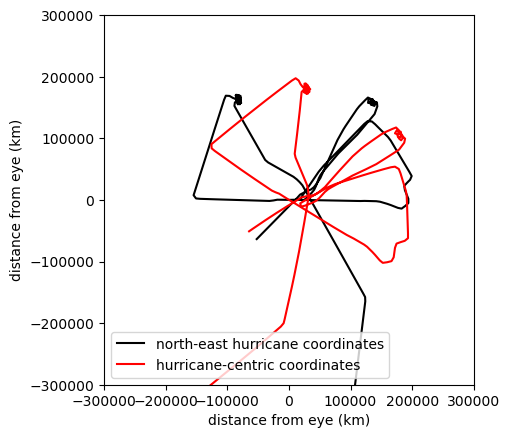

In [ ]:
fig, ax = plt.subplots()
ax.plot(ds['hurricane_eye_distance_east'],
        ds['hurricane_eye_distance_north'],
        color='k',
        label='north-east hurricane coordinates')
ax.plot(ds['hurricane_eye_distance_east_storm_coord'],
        ds['hurricane_eye_distance_north_storm_coord'],
        color='red',
        label='hurricane-centric coordinates')
ax.set_xlim(3*10**5 * np.array([-1, 1]))
ax.set_ylim(3*10**5 * np.array([-1, 1]))
ax.set_xlabel('distance from eye (km)')
ax.set_ylabel('distance from eye (km)')
ax.set_aspect('equal')
ax.legend(loc='lower left')

The rotation into storm coordinates relies on the `'STORM_DIR'` field of IBTrACS.  The underlying IBTrACS data are stored as a property in the dataset, accessible as:

In [ ]:
time_slice = slice(ds.attrs['time_coverage_start'],
                   ds.attrs['time_coverage_end'])

ds.wsra.best_track.df[time_slice]['STORM_DIR']

ISO_TIME
2022-09-06 09:00:00+00:00    318
2022-09-06 12:00:00+00:00    332
Name: STORM_DIR, dtype: object

## Visualization

<GeoAxes: >

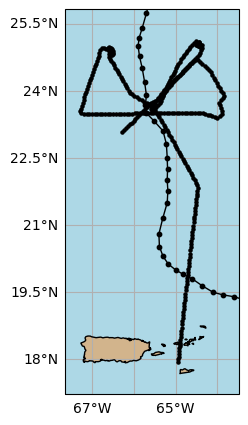

In [ ]:
# ds.wsra.plot(plot_best_track=False)
ds.wsra.plot()

## References

Knapp, K. R., Diamond, H. J., Kossin, J. P., Kruk, M. C., & Schreck, C. J. (2018). International Best Track Archive for Climate Stewardship (IBTrACS) Project, version 04r00 [Dataset]. National Centers for Environmental Information. https://doi.org/10.25921/82ty-9e16

Knapp, K. R., Kruk, M. C., Levinson, D. H., Diamond, H. J., & Neumann, C. J. (2010). The International Best Track Archive for Climate Stew- ardship, (IBTrACS): Unifying tropical cyclone best track data. Bulletin of the American Meteorological Society, 91(3), 363–376. https://doi. org/10.1175/2009BAMS2755.1

Pincus, R. et al. Observations from the NOAA P-3 aircraft during ATOMIC. Earth Syst. Sci. Data 13, 3281–3296 (2021).